# Support Vector Machine Regressor Implementation

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# Creating a synthetic dataset

from sklearn.datasets import make_regression

In [29]:
x, y = make_regression(n_samples= 1000, n_features= 2, n_targets= 1, noise = 3.0)

## Visualizing the datapoints

<Axes: xlabel='0', ylabel='1'>

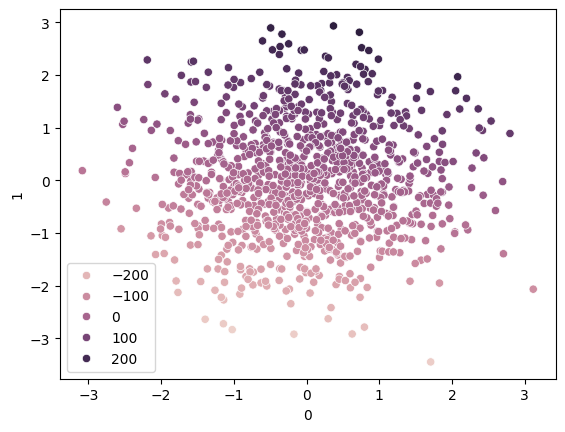

In [30]:
# Plotting the graph with both features x1 and x2 in x and y axis respectively.

sns.scatterplot(x = pd.DataFrame(x)[0], y = pd.DataFrame(x)[1], hue = y)

## Train test split

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 10)

## Implementing SVR model

In [32]:
from sklearn.svm import SVR

In [33]:
svr_model = SVR(kernel = 'linear')

In [34]:
svr_model.fit(x_train, y_train)

SVR(kernel='linear')

In [35]:
svr_model.coef_

array([[19.7664241, 82.5676365]])

In [36]:
y_pred = svr_model.predict(x_test)
y_pred

array([ 2.02095339e+02, -1.06569883e+02,  9.67164298e+01,  1.48750330e+01,
        8.31653855e+01, -2.42676449e+01, -2.70473051e+01, -4.09225585e+01,
        1.13630046e+02, -3.94514772e+01,  8.48458505e+01,  1.53146406e+02,
       -1.20553005e+02, -6.08451812e+01, -1.67013997e+01,  3.48124479e+00,
       -4.25900783e+01,  2.41136585e+01,  1.50711361e+02,  6.30366774e+01,
       -4.76769119e+01, -1.38078063e+02,  6.39503146e+01, -1.09153120e+02,
        6.33744723e+00, -1.75914359e+02,  8.23860694e+01,  7.04044181e+01,
       -1.77364170e+01, -1.03490789e+02, -3.84929877e+01,  2.46105820e+02,
        2.18726270e+01, -2.11290385e+02, -8.49757381e+01,  1.15562823e+02,
        3.69765680e+01, -7.02961652e+01, -3.68592183e+01,  3.05655051e+01,
        8.45072174e+01,  1.06341472e+02, -9.92340504e+01,  3.60108804e+00,
       -1.03167612e+02, -3.38215377e+01, -1.97346522e+02,  4.69564497e+01,
        2.03011438e+02, -1.71265196e+02,  4.57160904e+01,  1.73383214e+02,
        1.80626803e+01,  

# Performance metrics

In [37]:
from sklearn.metrics import r2_score

In [38]:
score = r2_score(y_pred, y_test)
print("r2 score : ", score)

r2 score :  0.9987839467752737


## Hyperparameter tuning with SVR

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel' : ['linear'],
              'epsilon': [0.1, 0.2, 0.3]
              }

In [41]:
cv = GridSearchCV(SVR(), param_grid = parameters, refit = True, cv = 5, verbose = 3)

In [42]:
cv.fit(x_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.820 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.807 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.823 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.803 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.827 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.820 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.807 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.823 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.803 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.827 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [43]:
cv.best_params_

{'C': 1000, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [44]:
y_pred = cv.predict(x_test)
y_pred

array([ 2.02890032e+02, -1.06883826e+02,  9.71077968e+01,  1.49893171e+01,
        8.35792368e+01, -2.42536642e+01, -2.70801898e+01, -4.09965931e+01,
        1.14119319e+02, -3.94929211e+01,  8.52431160e+01,  1.53787369e+02,
       -1.20901176e+02, -6.09708956e+01, -1.66840957e+01,  3.56521211e+00,
       -4.26701018e+01,  2.42802153e+01,  1.51330190e+02,  6.33295972e+01,
       -4.77782873e+01, -1.38497923e+02,  6.42926607e+01, -1.09417518e+02,
        6.43770559e+00, -1.76467721e+02,  8.27515992e+01,  7.07419358e+01,
       -1.77493879e+01, -1.03815885e+02, -3.85656041e+01,  2.47075902e+02,
        2.20346541e+01, -2.11966505e+02, -8.51975879e+01,  1.16048661e+02,
        3.71759757e+01, -7.04610433e+01, -3.69112129e+01,  3.07294677e+01,
        8.48970069e+01,  1.06798633e+02, -9.95083169e+01,  3.67884259e+00,
       -1.03454122e+02, -3.38771245e+01, -1.97997880e+02,  4.72084532e+01,
        2.03848969e+02, -1.71815717e+02,  4.59702013e+01,  1.74087606e+02,
        1.82339514e+01,  

## Performance metrics

In [45]:
score = r2_score(y_pred, y_test)

In [46]:
print("After Hypeparameter tuning: ")

print("r2 score : ", score)

After Hypeparameter tuning: 
r2 score :  0.998805198795794


NOTE: Here the accuracy is high because the datapoints are in range nearly [-3,3], it is like feature scaled already.

As it is like feature scaled, the accuracy is high.